In [1]:
import cartopy.crs
from cartopy import feature
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean.cm
import numpy
import xarray
import pandas
import pathlib
import yaml

spill_locations = '/Users/rmueller/Projects/MIDOSS/analysis-rachael/notebooks/data/SalishSea_oil_spills_5000.csv'
spill_locs = pandas.read_csv(spill_locations)

all_vessels = [
    'tanker', 
    'atb', 
    'barge', 
    'cargo', 
    'cruise',
    'ferry', 
    'fishing', 
    'smallpass', 
    'other'
]

In [2]:
spill_locs_err = spill_locs[spill_locs.spill_volume == -99999]

In [3]:
spill_locs_err

,spill_date_hour,run_days,spill_lon,spill_lat,geotiff_x_index,geotiff_y_index,vessel_mmsi,vessel_type,spill_volume,spill_type
194,2018-04-23 11:00,7,-123.941391,48.237428,287,495,366892350,smallpass,-99999.0,-99999
578,2018-04-16 12:00,7,-122.296616,47.956835,306,605,311003300,ferry,-99999.0,-99999
635,2018-08-08 19:00,7,-122.299014,47.954245,306,605,316009547,ferry,-99999.0,-99999
749,2018-04-09 19:00,7,-123.193576,49.033774,233,545,316005417,cargo,-99999.0,-99999
886,2018-09-19 11:00,7,-123.962738,49.196114,223,493,316003483,ferry,-99999.0,-99999
981,2018-10-19 16:00,7,-123.563774,48.871062,244,520,316033458,ferry,-99999.0,-99999
1040,2018-05-09 00:00,7,-124.009521,49.545116,199,490,316026483,smallpass,-99999.0,-99999
1078,2018-03-05 03:00,7,-123.622208,48.995949,236,516,319032800,barge,-99999.0,-99999
1091,2018-08-10 23:00,7,-124.663442,50.149715,159,447,316003663,other,-99999.0,-99999
1094,2018-02-14 23:00,7,-122.674395,47.925738,308,580,366988940,smallpass,-99999.0,-99999


In [4]:
n_err = []
for vessel in all_vessels:
     n_err.append(len(spill_locs_err[spill_locs_err.vessel_type==vessel]))

Text(0.5,1,'Number of "no data" instances by vessel for 5000 runs')

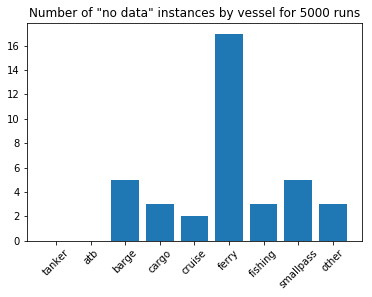

In [5]:
fig = plt.figure()
plt.bar(all_vessels, n_err)
plt.xticks(rotation=45)
plt.title('Number of "no data" instances by vessel for 5000 runs')

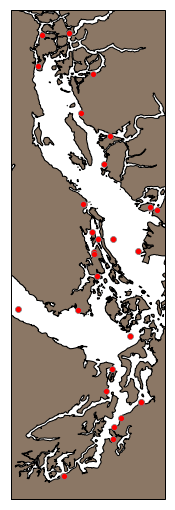

In [12]:
rotated_crs = cartopy.crs.RotatedPole(pole_longitude=120.0, pole_latitude=63.75)
plain_crs = cartopy.crs.PlateCarree()

%matplotlib inline    

fig,axs = plt.subplots(
    1, 1, figsize=(9, 9), subplot_kw={"projection": rotated_crs, "facecolor": "white"}
)
axs.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='#8b7765'), zorder=1)
scatter_err = axs.scatter(
    spill_locs_err.spill_lon, 
    spill_locs_err.spill_lat, 
    label = spill_locs_err.vessel_type,
    color='red',
    alpha = 1,
    edgecolors='grey',
    linewidth=0.7,
    transform=plain_crs,
    zorder=2
)
